<a href="https://colab.research.google.com/github/ngabo-dev/Principle-Component_Analysis/blob/main/PCA_Formative_1%5BPeer_Pair_4%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Formative Assignment: Advanced Linear Algebra (PCA)
This notebook will guide you through the implementation of Principal Component Analysis (PCA). Fill in the missing code and provide the required answers in the appropriate sections. You will work with the `fuel_econ.csv` dataset.

Make sure to display outputs for each code cell when submitting.

### Step 1: Load and Standardize the Data
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

In [56]:
# Step 1: Load and Standardize the data (use of numpy only allowed)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load dataset
file_path = "/content/drive/My Drive/Colab Notebooks/fuel_econ.csv"
fuel_econ = pd.read_csv(file_path)
data = fuel_econ.select_dtypes(include=[np.number])  # Select numerical columns

# Handle missing values (imputation)
data = data.fillna(data.mean())  # Fill missing values with column mean

# Standardize the data
data_mean = np.mean(data, axis=0)
data_std = np.std(data, axis=0, ddof=1)  # Use ddof=1 for sample standard deviation
standardized_data = ((data - data_mean) / data_std).values  # Ensure it's a NumPy array

print("First few rows of standardized data:")
print(standardized_data[:5])  # Use slicing since it's a NumPy array

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
First few rows of standardized data:
[[-1.7369194  -1.47564765  0.2830656   0.65045315  1.46690956 -1.21722273
  -0.85985067 -0.85232138 -1.29046556 -1.39229737 -1.00819446  1.02270812
  -0.95045855 -0.94563512]
 [-1.73646264 -1.47564765 -0.78171635 -0.72790568  1.86452492 -1.21722273
   0.00642593 -0.11741913  0.184923   -0.03919539  0.07185464 -0.29851198
   0.1885842   0.19423308]
 [-1.73600589 -1.47564765  0.2830656   0.49730217  1.86452492 -1.21722273
  -0.69432796 -0.75314886 -0.59194435 -0.85164117 -0.68625195  0.56786185
  -0.38093718 -0.37570102]
 [-1.73554913 -1.47564765  0.2830656   0.49730217  1.86452492 -1.21722273
  -0.78270066 -0.83018033 -0.82727856 -1.02745718 -0.81854705  0.75196629
  -0.38093718 -0.37570102]
 [-1.73509237 -1.47564765 -0.78171635 -0.42160372 -0.627198    0.73479668
   0.47102299  0.43309178  0.96739272  0.99240504  0.6479763

### Step 3: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

In [57]:
# Step 3: Calculate the Covariance Matrix
cov_matrix = np.cov(standardized_data.T)
print("Covariance Matrix:")
print(cov_matrix)

Covariance Matrix:
[[ 1.          0.98566773 -0.06009618 -0.07466587 -0.00656857 -0.02195097
   0.09179979  0.09122527  0.09059304  0.09535947  0.09380298 -0.0997169
  -0.12787305 -0.12232093]
 [ 0.98566773  1.         -0.05531293 -0.07042368  0.00623239 -0.03364318
   0.06805006  0.06674239  0.0732897   0.07764062  0.07199349 -0.08116464
  -0.14982946 -0.1451408 ]
 [-0.06009618 -0.05531293  1.          0.93387245  0.24757081 -0.00426438
  -0.69310259 -0.66602886 -0.76627474 -0.77150323 -0.73802323  0.84827383
  -0.78385803 -0.78181544]
 [-0.07466587 -0.07042368  0.93387245  1.          0.25933608  0.02207168
  -0.7134791  -0.68616562 -0.78398415 -0.78845698 -0.75839716  0.85537478
  -0.79343231 -0.79121609]
 [-0.00656857  0.00623239  0.24757081  0.25933608  1.         -0.66564191
  -0.27810882 -0.27254576 -0.29680809 -0.29850423 -0.29088306  0.28720012
  -0.29608842 -0.2931564 ]
 [-0.02195097 -0.03364318 -0.00426438  0.02207168 -0.66564191  1.
   0.03518763  0.03786895  0.0749516   0.

### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [58]:
# Step 4: Perform Eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

### Step 5: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

In [59]:
# Step 5: Sort Principal Components
sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort in descending order
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

print("Sorted Eigenvalues:")
print(sorted_eigenvalues)
print("Sorted Eigenvectors:")
print(sorted_eigenvectors)

Sorted Eigenvalues:
[8.95492947e+00 2.06725328e+00 1.59323656e+00 6.70416990e-01
 3.01607334e-01 1.60976566e-01 1.25518516e-01 6.40042264e-02
 3.23446619e-02 1.36927574e-02 9.24391778e-03 4.24529707e-03
 2.14303627e-03 3.87387264e-04]
Sorted Eigenvectors:
[[ 1.89952516e-02 -6.87675276e-01  7.65365183e-02  1.83729680e-02
  -1.42115022e-02  7.02789695e-02  1.14861126e-01  4.01097554e-03
  -1.15143583e-01 -6.95538857e-01 -6.83326435e-02  2.10633586e-02
  -7.10578367e-03  6.07618642e-04]
 [ 1.24694065e-02 -6.89503292e-01  6.88439505e-02 -9.43831862e-03
  -1.35600088e-02  3.37955333e-02  8.53170135e-02 -7.51768613e-03
  -5.48830131e-02  7.10425085e-01  5.58369479e-02 -9.48384475e-03
  -3.26885432e-04 -3.98397374e-03]
 [-2.81632694e-01  1.98550575e-02  5.61398643e-02  6.00933196e-01
   9.71151716e-02 -7.09369930e-02  2.53817629e-01 -6.79764243e-01
   1.19688616e-01  2.20121563e-03  1.99493288e-02  1.60174402e-02
   8.04028190e-03 -8.90395340e-04]
 [-2.86142593e-01  3.10582044e-02  6.39803619

### Step 6: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [60]:
# Step 6: Determine the number of components dynamically
explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)
cumulative_variance = np.cumsum(explained_variance_ratio)
num_components = np.argmax(cumulative_variance >= 0.95) + 1  # Keep enough PCs to explain 95% variance
print(f"Selected number of components: {num_components}")
print("Explained Variance Ratio:")
print(explained_variance_ratio[:num_components])

# Project Data onto Principal Components
projection_matrix = sorted_eigenvectors[:, :num_components]
reduced_data = np.dot(standardized_data, projection_matrix)

print(f"Reduced Data Shape: {reduced_data.shape}")
print("First few rows of reduced data:")
print(reduced_data[:5])

Selected number of components: 5
Explained Variance Ratio:
[0.63963782 0.14766095 0.11380261 0.04788693 0.02154338]
Reduced Data Shape: (3929, 5)
First few rows of reduced data:
[[-3.1910559   1.98744119 -1.85119243 -0.41127775  0.02012798]
 [ 0.38747769  1.99169227 -2.47938762 -0.76199385 -0.61163585]
 [-2.0912188   2.03717464 -2.20553336 -0.16626262 -0.4198442 ]
 [-2.37883798  2.06353891 -2.18924185 -0.27744978 -0.39131766]
 [ 2.59693755  2.50388336  0.47493676 -0.09057204 -0.30385854]]


### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [61]:
# Step 7: Output the Reduced Data
print(f'Reduced Data Shape: {reduced_data.shape}')  # Display reduced data shape
reduced_data[:5]  # Display the first few rows of reduced data

Reduced Data Shape: (3929, 5)


array([[-3.1910559 ,  1.98744119, -1.85119243, -0.41127775,  0.02012798],
       [ 0.38747769,  1.99169227, -2.47938762, -0.76199385, -0.61163585],
       [-2.0912188 ,  2.03717464, -2.20553336, -0.16626262, -0.4198442 ],
       [-2.37883798,  2.06353891, -2.18924185, -0.27744978, -0.39131766],
       [ 2.59693755,  2.50388336,  0.47493676, -0.09057204, -0.30385854]])

### Step 8: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

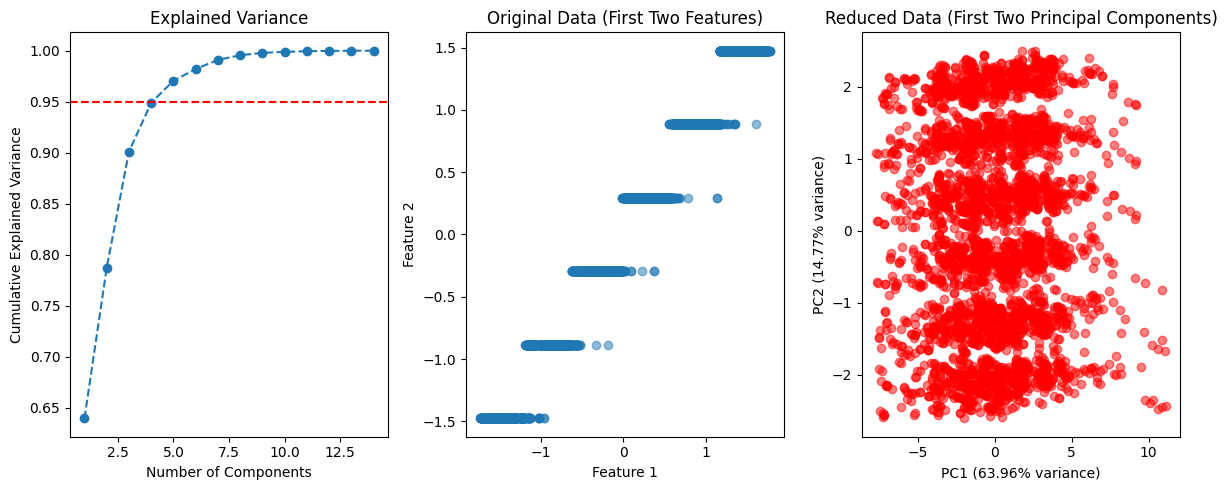

In [62]:
## Step 8: Visualize Explained Variance
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.plot(range(1, len(sorted_eigenvalues) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance')

# Visualize Original Data (First Two Features for Visualization)
plt.subplot(1, 3, 2)
plt.scatter(standardized_data[:, 0], standardized_data[:, 1], alpha=0.5)
plt.title("Original Data (First Two Features)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Transformed Data (First Two Principal Components)
plt.subplot(1, 3, 3)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.5, color='r')
plt.title("Reduced Data (First Two Principal Components)")
plt.xlabel(f"PC1 ({explained_variance_ratio[0]:.2%} variance)")
plt.ylabel(f"PC2 ({explained_variance_ratio[1]:.2%} variance)")

plt.tight_layout()
plt.show()